<a href="https://colab.research.google.com/github/007tickooayush/ML-Regression-TED-talks-Project/blob/master/Ayush_Tickoo_ML_Capstone_Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name   - TED Talk Views Prediction** 



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Contributor       - Ayush Tickoo**


# **Project Summary -**

In this project, the objective is to predict the number of views a TED talk session can have using the dataset provided, by applying specific methods to draw out heuristics after doing exploratory data analysis on the dataset. Before beginning with the data analysis, data wrangling will be done to get the data in a format ready for analysis. Hence after completing the wrangling and analysis statistically and visually, we will continue doing transformations on the dataset, if required. Transformations, such as encoding, normalization, and regularization of the dataset. After the data is ready is ready to be entered in to a model, it will be split into a proportion and a portion of it will be kept for testing the model chosen. Hence, multiple models will be applied to get acknowleged about the model that fits the dataset best for predictions, which will also be followed by paramter tuning, if required to get the highest accuracy possible.

# **GitHub Link -**

https://github.com/007tickooayush/ML-Regression-TED-talks-Project

# **Problem Statement**


TED is all about spreading powerful ideas on any topic. This dataset contains over 4,005 TED talks, including transcripts in multiple languages.

Founded in 1984 by Richard Salman, the nonprofit organization dedicated to bringing together experts in the fields of technology, entertainment, and design, TED talks have become a mecca for ideas from nearly every industry. In 2015, TED and its sister TEDx chapters published over 2,000 talks that are freely available to the general public, with a list of speakers including Al Gore, Jimmy Wales, Shah Rukh Khan and Bill Gates.

TED Talks has been using “ideas worth spreading” as a platform for years.
In the digital world we live in today, TED is a great platform to spread your ideas. But how do you know if your ideas will be heard or appreciated.

The main goal is to build a predictive model that can help predict the number of views of videos uploaded to the TEDx website.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















## **About the dataset**

### Import Libraries

In [65]:
# Import Libraries
from numpy import math
import numpy as np
import pandas as pd
import missingno as msno

from datetime import datetime

from sklearn.metrics import r2_score,log_loss
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score

from sklearn.linear_model import Ridge,Lasso, ElasticNet
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import KFold,train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

Mount Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount = False)

Mounted at /content/drive


### Dataset Loading

In [3]:
# Load Dataset
dir_path = '/content/drive/MyDrive/Colab Notebooks/ALMABETTER_DSC/1_1.2_Regression_Project/Ayush Tickoo ML Regression Project [Capstone Project]/data/'
df = pd.read_csv(dir_path+'data_ted_talks.csv')

In [4]:
# create a backup of the datafame
df_bkup = df.copy()

### Dataset First View

In [5]:
# Dataset First Look
df.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

In [7]:
# Description of non-numerical variables in dataset # (Printing transposed for the sake of readability)
df.describe(include='object').T

,count,unique,top,freq
title,4005,4005,Averting the climate crisis,1
speaker_1,4005,3274,Alex Gendler,34
all_speakers,4001,3306,{0: 'Alex Gendler'},34
occupations,3483,2049,{0: ['writer']},53
about_speakers,3502,2977,{0: 'Alex Rosenthal takes everyday experiences...,10
recorded_date,4004,1334,2017-04-24,97
published_date,4005,2962,2017-09-07,27
event,4005,459,TED-Ed,556
native_lang,4005,12,en,3957
available_lang,4005,3902,['en'],24


In [8]:
# Descrption of numerical columns # (Printing transposed for the sake of readability)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
talk_id,4005.0,1.243254e+04,1.744758e+04,1.0,1252.0,2333.0,23777.0,62794.0
views,4005.0,2.148006e+06,3.451226e+06,0.0,882069.0,1375508.0,2133110.0,65051954.0
comments,3350.0,1.619970e+02,2.688389e+02,0.0,38.0,89.0,188.0,6449.0
duration,4005.0,7.240112e+02,3.617755e+02,60.0,393.0,738.0,974.0,3922.0


In [9]:
# Dimensions of Dataset
df.shape

(4005, 19)

In [10]:
# First entry of dataset
df.iloc[0]

talk_id                                                           1
title                                   Averting the climate crisis
speaker_1                                                   Al Gore
all_speakers                                         {0: 'Al Gore'}
occupations                               {0: ['climate advocate']}
about_speakers    {0: 'Nobel Laureate Al Gore focused the world’...
views                                                       3523392
recorded_date                                            2006-02-25
published_date                                           2006-06-27
event                                                       TED2006
native_lang                                                      en
available_lang    ['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...
comments                                                      272.0
duration                                                        977
topics            ['alternative energy', 'cars',

In [11]:
# Last entry of dataset
df.iloc[-1]

talk_id                                                       62794
title                          The most important anus in the ocean
speaker_1                                              Cella Wright
all_speakers                                    {0: 'Cella Wright'}
occupations                                                     NaN
about_speakers                                                  NaN
views                                                             0
recorded_date                                            2020-04-30
published_date                                           2020-04-30
event                                                        TED-Ed
native_lang                                                      en
available_lang                                               ['en']
comments                                                        NaN
duration                                                        281
topics            ['animals', 'TED-Ed', 'animati

### Dataset Information

In [12]:
# Columns of the dataset
df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

#### Duplicate Values

In [13]:
# Dataset Duplicate Value Count
print('Count of Duplicates in dataset: ',(df.duplicated()).sum())

Count of Duplicates in dataset:  0


#### Missing Values/Null Values

In [14]:
# Missing Values/Null Values Count
df.isnull().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

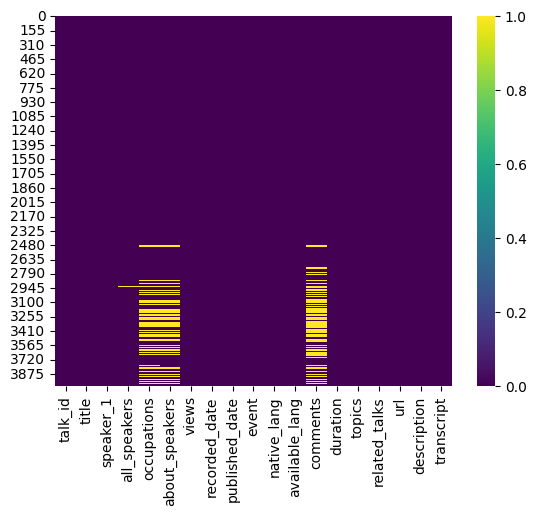

In [15]:
# Visualizing the missing values in form of heatmap
sns.heatmap(df.isnull(),cmap='viridis')
plt.show()

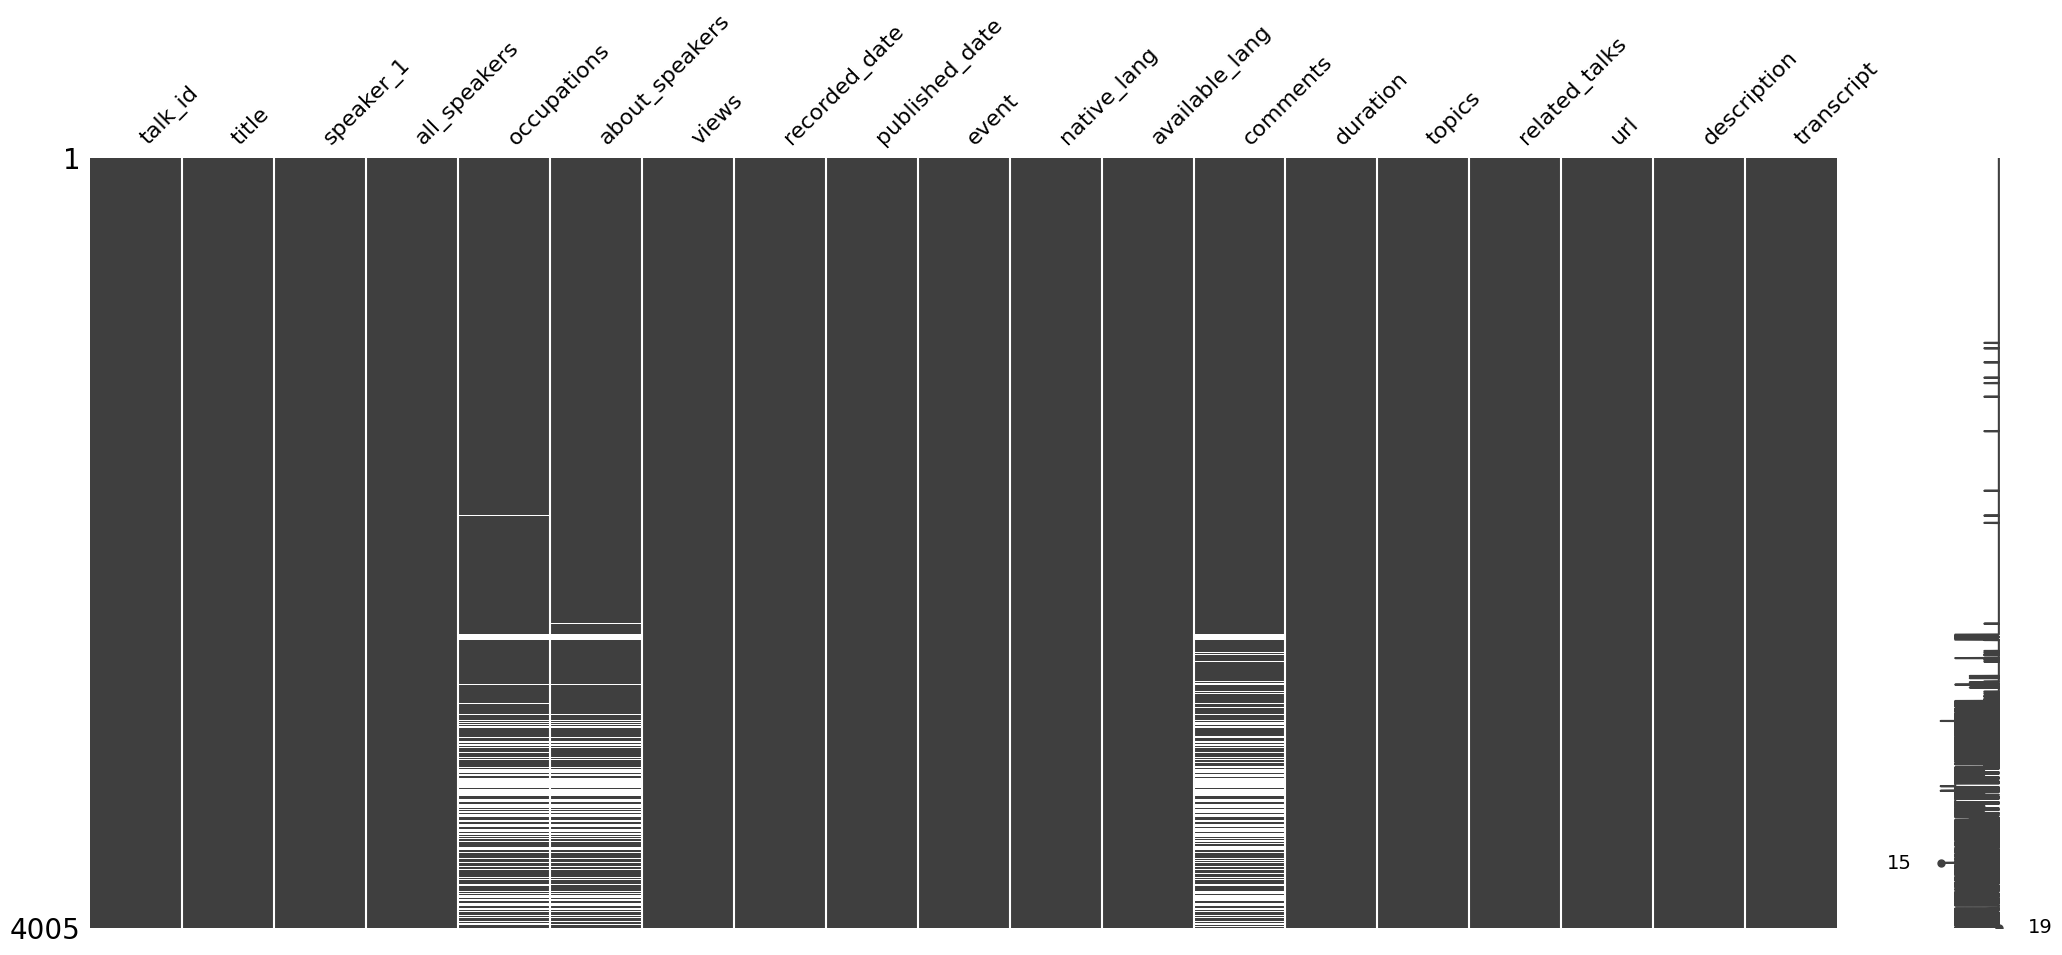

In [16]:
# Printing the matrix of missing/NaN values of columns
msno.matrix(df)
plt.show()

## **Understanding the Variables**

### Variables Description 


- **talk_id** - identification number provided by TED (int)
- **title** - Title of TED talk (string) 
- **speaker_1** - First speaker in TED speaker list (string)
- **all_speakers** - All the speakers in the TED session (dictionary) <br>`[FORMAT - {'speaker' : 'speaker_name'}`<br>`(speaker - speaker number of session, speaker_name - name of speaker)]`
- **occupations** - Occupation of the speakers of the session (dictionary) <br> `[FORMAT - {'speaker' : 'speaker_occupation'}`<br>`(speaker - speaker number of session, speaker_occupation - occupation of speaker)]`
- **about_speakers** - Descriptive text about speakers (dictionary) <br>`[FORMAT - {'speaker' : 'speaker_description'}`<br>`(speaker - speaker number of session, speaker_description - About the speaker)]`
- **views** - Number of views (int) {<u>**Dependent Variable**</u>}
- **recorded_date** - Date of the TED session (string)
- **published_date** - Date of TED session publishment (string) 
- **event** - Event of the TED session (string)
- **native_lang** - Native language (string)
- **available_lang** - All the available languages (list)
- **comments** - Number of comments received (dictionary)<br>`[FORMAT - {'talk_id' : 'title'}`<br>`(talk_id - column 1 of dataset, title - column 2 of dataset)]`
- **duration** - Duration of TED talk session (in seconds) (int)
- **topics** - Topic of the TED session and tags (list)
- **related_talks** - Related TED talk sessions (dictionary)<br>`[FORMAT - {'talk_id' : 'title'}`<br>`(talk_id - column 1 of dataset, title - column 2 of dataset)]`
- **url** - URL link of the TED session (string)
- **description** - Information about the TED talk session (string) 
- **transcript** - Complete transcript of the TED session (string)

### Check Unique Values for each variable.

In [36]:
# Check Unique Values for each variable.
unique_vals = pd.DataFrame(df.nunique(),columns=['unique_count'])
unique_vals['total'] = len(df)

unique_vals

,unique_count,total
talk_id,4005,4005
title,4005,4005
speaker_1,3274,4005
all_speakers,3306,4005
occupations,2049,4005
about_speakers,2977,4005
views,3996,4005
recorded_date,1334,4005
published_date,2962,4005
event,459,4005


## **Data Wrangling, Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

### Data Wrangling Code

In [56]:
# Write your code to make your dataset analysis ready.
df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

In [62]:
# trasforming the recorded_date and published date to datetime data type 
df['recorded_date'] = pd.to_datetime(df['recorded_date'])
df['published_date'] = pd.to_datetime(df['published_date'])

In [63]:
df['recorded_date'].dtype

dtype('<M8[ns]')

In [64]:
df['published_date'].dtype

dtype('<M8[ns]')

In [68]:
# function to get weekday in Integer format
def get_weekday_int(date):
  return date.weekday()

In [80]:
# create a column to get the day on which the TED session was published using the published_date
df['day_of_publish'] = df['published_date'].apply(get_weekday_int)

In [83]:
df['day_of_publish'].unique()

array([1, 0, 4, 2, 3, 5, 6])

In [84]:
# create a column to check whether the session was on working or non-working(weekend) day
def is_weekend(day):
  if day > 3 and day <=6:
    return 1
  else:
    return 0

In [85]:
df['published_on_weekend'] = df['day_of_publish'].apply(is_weekend)

In [87]:
df['published_on_weekend'].value_counts()

0    3119
1     886
Name: published_on_weekend, dtype: int64

### Insights found:

The most of the missing variables are found to be in columns : `occupations (dtype: dictionary)`, `about_speakers (dtype: disctionary)` and, `comments (dtype: string)` which are all the non-numerical and categorical variables.For the numerical columns have non-null values hence requrie minimal alterations. Also the columns like `native_lang` have non-unique string values present which can be encoded, as only after encoding it can be derived into a meaningful form. For the columns with complex datatypes such as list, dictionary, date embedded into string, transformations will be required to be applied to get the actual data in a format suitable for feature engineering. However for the outliers detected in the visualizations of the data, depending upon the correlation of the variable the treatement is requied to be done. 

Correlation HeatMap

In [57]:
df.corr()

,talk_id,views,comments,duration
talk_id,1.000000,-0.113291,-0.232926,-0.261955
views,-0.113291,1.000000,0.500748,0.073642
comments,-0.232926,0.500748,1.000000,0.175234
duration,-0.261955,0.073642,0.175234,1.000000


## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***